In [2]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sin, cos, pi

def diffract(theta, w, s, N, lmbda):
    k = (2 * pi) / lmbda
    v = 1/2 * k * s * sin(theta)
    u = 1/2 * k * w * sin(theta)
    y = (w ** 2) * (((sin(u) / u) * (sin(N * v) / sin(v))) ** 2)
    return y


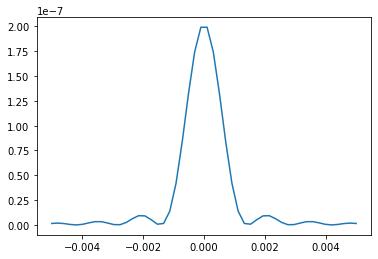

In [3]:
theta  = np.linspace(-0.005, 0.005, 50)
theory = diffract(theta, 5, 0.001, 1, 650e-9)
plt.plot(sin(theta), theory)


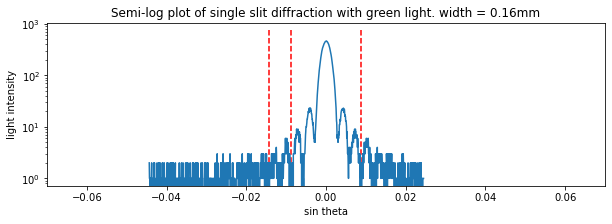

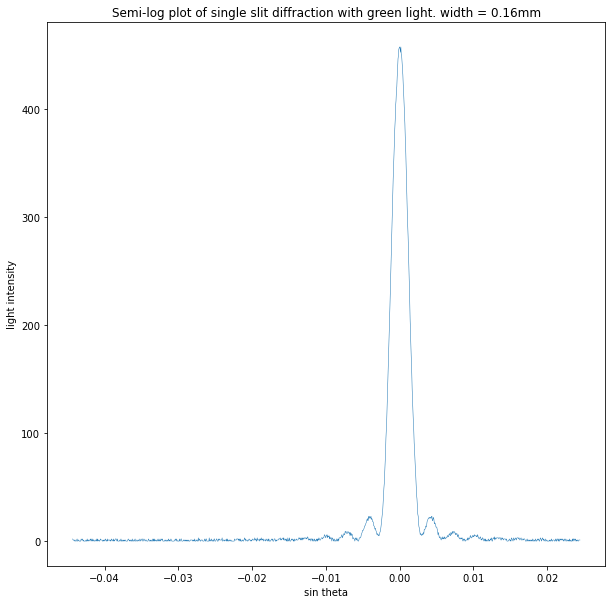

In [152]:
# code for red laser. double slit. photo = 1.5mm, width = 0.08mm, d = 0.05mm
x,y = np.loadtxt("green1single.txt", dtype = 'float', delimiter = ",", skiprows = 10, unpack = True)
x_shift = x * (54.74e-6) - 0.0041055 # the "- 0.0041055" is used to align the graph so the central maximum would be exactly at 0
L = 1 # distance from the source to the detector in m
theta = np.arctan(x_shift/L)
sinTheta = sin(theta)


sinTheta_min = []
array_min = []

i = 0
while i < len(y) - 2:
    if (y[i+1] > y[i] and i != 0 and y[i - 1] > y[i]) or y[i] == 0:
        array_min.append(y[i])
        sinTheta_min.append(sinTheta[i])
    i += 1

print("sin theta: ", sinTheta_min)
print("log intensity", array_min)    

#log intensity graph
plt.figure(figsize = (10, 3))
plt.semilogy(sinTheta, y) #acutal blue graph
plt.vlines(-0.008758064092773955, 750, 0, colors = 'r', linestyle = 'dashed') #measuring the angle
plt.vlines(-0.014395128290946146, 750, 0, colors = 'r', linestyle = 'dashed')
plt.vlines(0.008867531338644976, 750, 0, colors = 'r', linestyle = 'dashed')
plt.title("Semi-log plot of single slit diffraction with green light. width = 0.16mm")
plt.xlabel("sin theta")
plt.ylabel("light intensity")
plt.xlim([-0.07, 0.07])

plt.show()


#normal graph
plt.figure(figsize = (10,10))
plt.plot(sinTheta, y, lw = 0.5)
plt.title("Semi-log plot of single slit diffraction with green light. width = 0.16mm")
plt.xlabel("sin theta")
plt.ylabel("light intensity")
plt.show()